## **SETUP**
Installing and importing Tensorflow, matplotlib

In [4]:
%pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install tensorflow-gpu==2.9.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
annotated-types              0.7.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asgiref                      3.5.2
asttokens                    2.1.0
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        20.3.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.8.2
cachetools                   5.4.0
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.0
click                        8.1.7
colorama                     0.4.6
contourpy                    1.0.6
cryptography                 37.0.4
cycler                       0.11.0
debugpy                      1.6.3
d

In [8]:
import tensorflow as tf


In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')


[]

## **CLEANING DATA**


In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
import os
filePath = 'data'
os.path.exists(filePath)

True

In [13]:
import cv2
import imghdr

In [14]:

melanoma = os.path.join(filePath, 'melanoma')


In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [16]:
os.path.exists(melanoma)

True

In [17]:
os.listdir(filePath)

['acne', 'healthy skin', 'melanoma']

In [18]:
for image_class in os.listdir(filePath):
    for image in os.listdir(os.path.join(filePath, image_class)):

        image_path = os.path.join(filePath, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)
            # os.remove(image_path)

# **Loading Data**

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory(filePath)

Found 300 files belonging to 3 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch  = data_iterator.next()
# Acne (0), Healthy Skin (1), Melanoma (2)
# Caution when running this multiple times


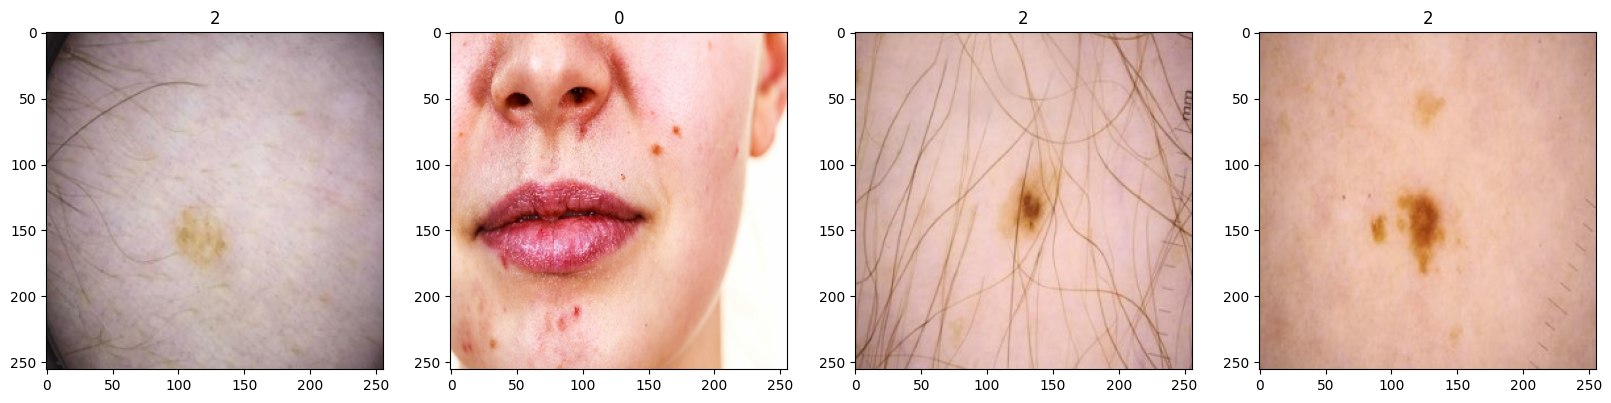

In [23]:
# Preview
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale Data**

In [24]:
data = data.map(lambda x,y: (x/255, y))


In [25]:
data.as_numpy_iterator().next()


(array([[[[0.7140625 , 0.5532782 , 0.58465075],
          [0.7186581 , 0.5578738 , 0.58722425],
          [0.72325367, 0.56246936, 0.5859988 ],
          ...,
          [0.77423406, 0.6173713 , 0.64874387],
          [0.7669781 , 0.61011535, 0.6414879 ],
          [0.7578738 , 0.60101104, 0.6323836 ]],
 
         [[0.7140625 , 0.5532782 , 0.58465075],
          [0.7186581 , 0.5578738 , 0.58722425],
          [0.72325367, 0.56246936, 0.5859988 ],
          ...,
          [0.77625614, 0.6193934 , 0.65076596],
          [0.77166057, 0.6147978 , 0.6461703 ],
          [0.76348037, 0.6066176 , 0.6379902 ]],
 
         [[0.71560276, 0.55481845, 0.5859014 ],
          [0.7186581 , 0.5578738 , 0.584723  ],
          [0.72325367, 0.56246936, 0.5845507 ],
          ...,
          [0.7837623 , 0.6268995 , 0.6582721 ],
          [0.77916664, 0.6223039 , 0.65367645],
          [0.77252674, 0.615664  , 0.64703655]],
 
         ...,
 
         [[0.6918811 , 0.52717525, 0.5310968 ],
          [0.69289

In [26]:
len(data)

10

# **Split Data**

In [27]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.20)
test_size = int(len(data)*20)
train_size


6

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
#len(train)
len(val)
len(test)


2

In [30]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#final layer should match the number of classes

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# **Train**

In [36]:
logdir='logs'


In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [38]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/11
6/6 [==============================] - 7s 810ms/step - loss: 1.2550 - accuracy: 0.3438 - val_loss: 1.1019 - val_accuracy: 0.3281
Epoch 2/11
6/6 [==============================] - 5s 772ms/step - loss: 1.0416 - accuracy: 0.4479 - val_loss: 0.9998 - val_accuracy: 0.4688
Epoch 3/11
6/6 [==============================] - 5s 774ms/step - loss: 0.9958 - accuracy: 0.5260 - val_loss: 1.0720 - val_accuracy: 0.4375
Epoch 4/11
6/6 [==============================] - 6s 1s/step - loss: 0.8464 - accuracy: 0.6302 - val_loss: 0.6883 - val_accuracy: 0.7812
Epoch 5/11
6/6 [==============================] - 6s 919ms/step - loss: 0.7256 - accuracy: 0.7135 - val_loss: 0.5654 - val_accuracy: 0.7656
Epoch 6/11
6/6 [==============================] - 5s 828ms/step - loss: 0.6571 - accuracy: 0.7135 - val_loss: 0.4782 - val_accuracy: 0.7969
Epoch 7/11
6/6 [==============================] - 6s 868ms/step - loss: 0.5485 - accuracy: 0.7344 - val_loss: 0.5764 - val_accuracy: 0.8438
Epoch 8/11
6/6 [=======

# **Analysis**

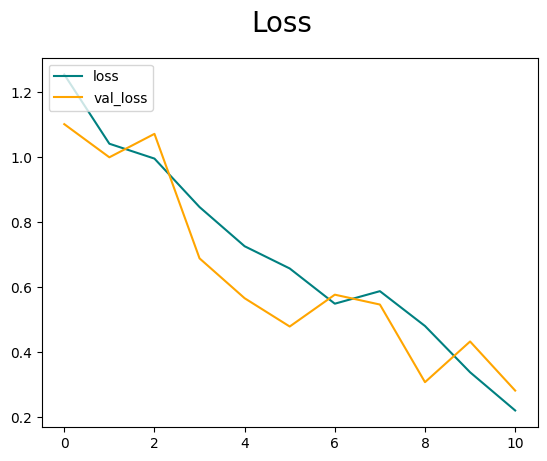

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [40]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [42]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [43]:
'''
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    
    acc.update_state(y, yhat)
    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format
    re.update_state(y, tf.argmax(yhat, axis=1))
'''


'\nfor batch in test.as_numpy_iterator():\n    x, y = batch\n    yhat = model.predict(x)\n    \n    acc.update_state(y, yhat)\n    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format\n    re.update_state(y, tf.argmax(yhat, axis=1))\n'

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

def predict_fn(model, x):
    return model(x, training=False)

y_true = []
y_pred_classes = []

for batch in test.as_numpy_iterator():
    x, y = batch

    # Step 3: Call the predict function (this avoids retracing)
    y_pred = predict_fn(model, x)

    # Convert predictions to class labels
    y_pred_classes.extend([np.argmax(element) for element in y_pred.numpy()])
    y_true.extend(y)  # Collect true labels

# Step 4: Print the classification report
print("Classification Report: \n", classification_report(y_true, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92        12

    accuracy                           0.95        44
   macro avg       0.95      0.96      0.95        44
weighted avg       0.96      0.95      0.96        44



In [45]:
print(pre.result(), re.result(), acc.result())
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)
0.0 0.0 0.0


# **Testing**

In [46]:
import cv2

In [47]:
os.listdir()

['.git',
 'data',
 'logs',
 'main.py',
 'models',
 'modelTraining.ipynb',
 'node_modules',
 'out_of_data_tests',
 'package-lock.json',
 'package.json',
 'runModel.py',
 '__pycache__']

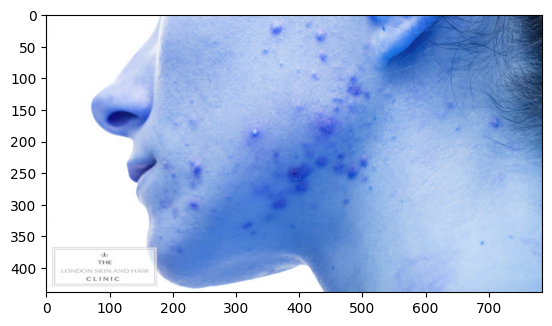

In [48]:
img = cv2.imread('out_of_data_tests/acne_test.jpeg')
plt.imshow(img)
plt.show()

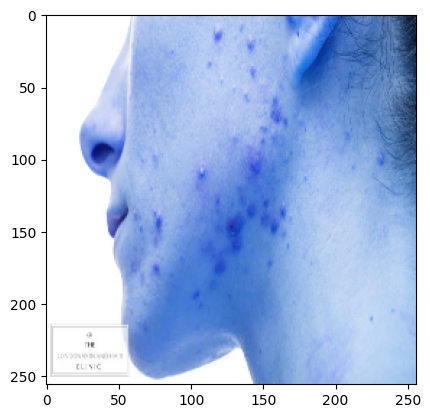

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 237ms/step


In [51]:
yhat[0]


array([0.12197319, 0.85672456, 0.02130224], dtype=float32)

In [52]:
predicted_class = np.argmax(yhat, axis=1)
predicted_class

array([1], dtype=int64)

# **Saving Model**

In [53]:
from tensorflow.keras.models import load_model
#os.chdir('/content/drive/MyDrive/skindoctor')
os.getcwd()


'c:\\Users\\Jaden\\cs-projects\\skindoctor'

In [54]:
model.save(os.path.join('models','skindoctor.keras'))


In [55]:
#os.path.exists('models')
#os.listdir('models')
os.getcwd()
#does it reset every time you referesh page?( what determines the currentwroking dir)

'c:\\Users\\Jaden\\cs-projects\\skindoctor'

In [56]:
os.path.exists('models/skindoctor.keras')

True

In [57]:
new_model = load_model('models/skindoctor.keras')


In [58]:
print(new_model.predict(np.expand_dims(resize/255, 0)))


1/1 [==============================] - 0s 176ms/step
[[0.12197319 0.85672456 0.02130224]]
